# Sumário de dados EP1

In [1]:
import zipfile
from collections import Counter
from pathlib import Path 

from matplotlib import pyplot as plt

import pandas as pd

from skimage.transform import resize
from skimage import data, io

%matplotlib inline

In [2]:
# this cell was used once to unzip the full images dataset

# BASE_DIR = 'dataset_mac5768'

# with zipfile.ZipFile('dataset_mac5768.zip', 'r') as zip_ref:
#     zip_ref.extractall(BASE_DIR)

In [6]:
ROWS = 1280
COLS = 720 

base_dir = Path(BASE_DIR + '/dataset_mac5768/')

In [4]:
# this cell was used once to resize all images to 1280x720

# for i in base_dir.rglob('*'):
#     if i.is_file():
#         head, tail = os.path.split(i)
#         object_class = head.split('/')[-1]
#         path = f'output_data/{object_class}'
#         if not os.path.exists(path):
#             os.makedirs(path)
#         img = imread(i)
#         img_resized = resize(img, (ROWS, COLS), anti_aliasing=True)
#         imsave(f'{path}/{tail}', img_resized)

In [7]:
resized_dir = Path('output_data/')

file_counts = Counter(p.parent for p in base_dir.rglob('*'))

In [8]:
df = pd.DataFrame.from_dict(file_counts, orient='index').reset_index()[1:]

df = df.rename(columns={'index': 'class', 0: 'count'})
df['class'] = df['class'].astype(str).str.split('/', expand=True)[2]

In [9]:
dataset_size_mb = round(sum(f.stat().st_size for f in resized_dir.rglob('*') if f.is_file()) / 1e6, 2)

summary_table = {'Número de classes': df['class'].count(),
                 'Número de imagens': df['count'].sum(),
                 'Tamanho da base (MB)': dataset_size_mb,
                 'Resolução das imagens': f'{ROWS} linhas por {COLS} colunas'}

## Tabela sumária global

In [10]:
summary_df = pd.DataFrame.from_dict(summary_table, orient='index').reset_index().rename(columns={'index': 'Nome do atributo', 0: 'Atributo'})
summary_df

,Nome do atributo,Atributo
0,Número de classes,10
1,Número de imagens,1296
2,Tamanho da base (MB),165.16
3,Resolução das imagens,1280 linhas por 720 colunas


## Tabela sumária por classe

In [12]:
metadata = pd.read_csv('metadata.csv')

metadata['object'] = metadata['description'].str.split(' ').str[:2].str.join(' ')
metadata['class'] = metadata['class'].str.replace(' ', '_')

In [46]:
metadata.head()

,id,filename,date,class,background,daytime,indoor,description,object
0,1,IMG_0356.jpg,2020-09-10,pen,brown leather,0,0,blue pilot pen brown leather background night ...,blue pilot
1,2,IMG_0358.jpg,2020-09-10,pen,brown leather,0,0,blue pilot pen brown leather background night ...,blue pilot
2,3,IMG_0359.jpg,2020-09-10,pen,brown leather,0,0,orange staedtler pen brown leather background ...,orange staedtler
3,4,IMG_0360.jpg,2020-09-10,pen,brown leather,0,0,orange staedtler pen brown leather background ...,orange staedtler
4,5,IMG_0362.jpg,2020-09-10,pen,brown leather,0,0,purple stabilo pen brown leather background ni...,purple stabilo


In [13]:
object_summary = {}

for _, row in df.iterrows():
    object_class = row['class']
    
    object_df = metadata[metadata['class'] == object_class]
    num_objects = object_df['object'].nunique()
    
    num_backgrounds = object_df['background'].nunique()
    backgrounds = object_df['background'].unique()
    backgrounds = ', '.join(backgrounds)
    
    num_illuminations = 4
    illuminations = ['daytime indoor', 'daytime outdoor', 'nighttime indoor', 'nighttime outdoor']
    illuminations = ', '.join(illuminations)
    
    num_reps = 3
    
    total_samples = row['count']
    
    class_info = {'Número de objetos': num_objects,
                  'Número de variações de fundo': num_backgrounds,
                  'Descrição variações de fundo': backgrounds,
                  'Número de variações de iluminação': num_illuminations,
                  'Descrição variações de iluminação': illuminations,
                  'Número de repetições por objeto, fundo e iluminação': num_reps,
                  'Total de amostras': total_samples}
    
    
    object_summary[object_class] = class_info
    

In [14]:
object_summary_df = pd.DataFrame.from_dict(object_summary, orient='index')
object_summary_df

,Número de objetos,Número de variações de fundo,Descrição variações de fundo,Número de variações de iluminação,Descrição variações de iluminação,"Número de repetições por objeto, fundo e iluminação",Total de amostras
earring,3,3,"purple towel, white paper, brown leather",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
glasses,3,3,"purple towel, white paper, brown leather",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
nail_polish,4,3,"purple towel, white paper, brown leather",4,"daytime indoor, daytime outdoor, nighttime ind...",3,144
lipstick,3,3,"brown leather, purple towel, white paper",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
hand_sanitizer,3,3,"purple towel, white paper, brown leather",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
notebook,3,3,"brown leather, purple towel, white paper",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
knife,3,3,"purple towel, white paper, brown leather",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
pen,8,3,"brown leather, white paper, purple towel",4,"daytime indoor, daytime outdoor, nighttime ind...",3,288
mug,3,3,"brown leather, purple towel, white paper",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108
brush,3,3,"brown leather, purple towel, white paper",4,"daytime indoor, daytime outdoor, nighttime ind...",3,108


## Visualização da base

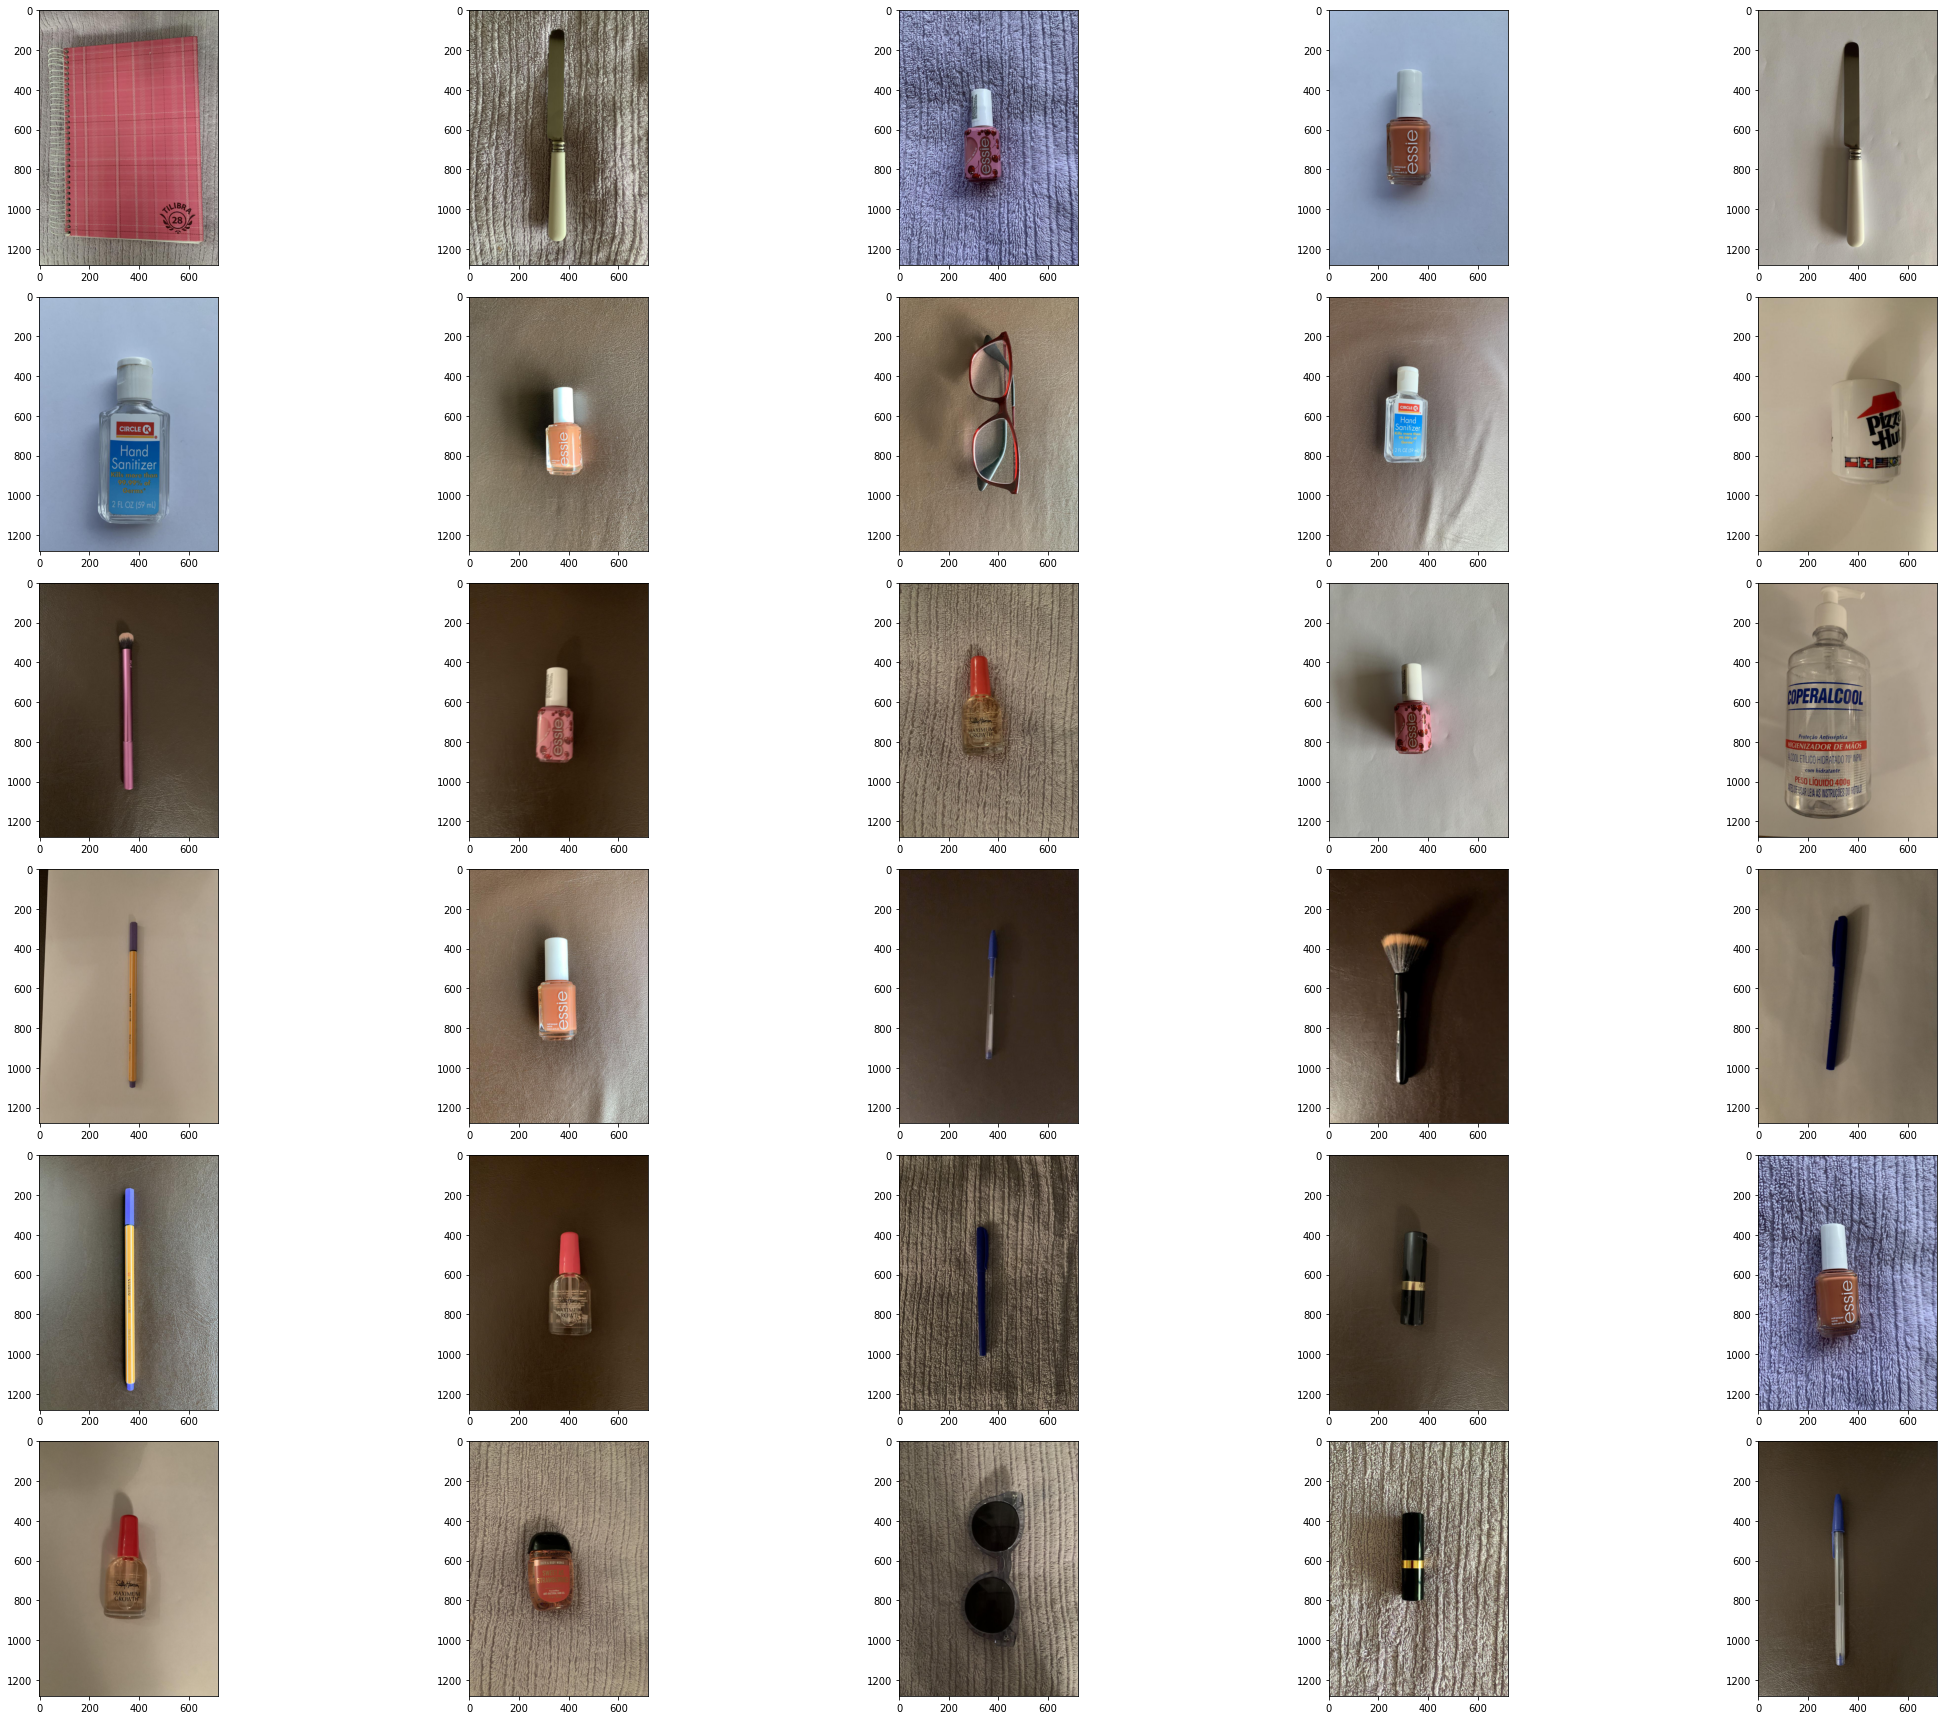

In [44]:
sample = metadata.sample(n=30)

fig, axes = plt.subplots(6, 5, figsize=(32, 24))
axs = axes.ravel()

for i, (_, row) in enumerate(sample.iterrows()):
    file = row['filename']
    object_class = row['class']
    path = f'output_data/{object_class}/{file}'
    img = io.imread(path)
    axs[i].imshow(img)
    axs[i].set_aspect(0.8)
    
fig.tight_layout()